In [65]:
# Notebook for article https://habrahabr.ru/post/328760/

In [80]:
import pandas as pnd
import numpy as nmp
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [93]:
def generateData(minValue, maxValue, N, dim):
    return minValue + nmp.random.rand(N, dim) * (maxValue - minValue)

def getCoefficients(text, regressor, X, y):
    regressor.fit(X, y)
    print(text, regressor.intercept_, regressor.coef_)

In [101]:
N = 100
minValue = -10.0
maxValue = 10.0

alpha_1 = 0.1
alpha_2 = 0.5
alpha_3 = 0.7

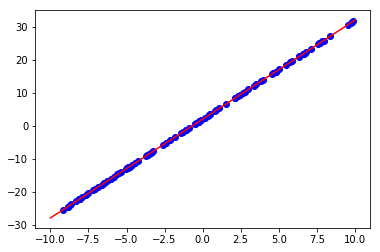

Ordinary: 2.0 [ 3.]
Ridge for alpha = 0.1: 1.99995243324 [ 2.99989941]
Ridge for alpha = 0.5: 1.99976219808 [ 2.9994971]
Ridge for alpha = 0.7: 1.99966709963 [ 2.99929599]
Lasso for alpha = 0.1: 1.99841438803 [ 2.99664679]
Lasso for alpha = 0.5: 1.99207194017 [ 2.98323396]
Lasso for alpha = 0.7: 1.98890071624 [ 2.97652755]


In [104]:
# 1D without noise

X = generateData(minValue, maxValue, N, 1)
X1 = X[:, 0]
Y = 2 + 3 * X1
pnd.DataFrame({"x1": X1,
               "x2": X2,
               "y": Y}).to_csv("../temp/1D_wo_noise.csv", index = False)

plt.scatter(X1, Y, color = "blue")
plt.plot([-10, 10], [-28, 32], color = "red")
plt.show()

getCoefficients("Ordinary:", LinearRegression(), X, Y)

getCoefficients("Ridge for alpha = 0.1:", Ridge(alpha_1), X, Y)
getCoefficients("Ridge for alpha = 0.5:", Ridge(alpha_2), X, Y)
getCoefficients("Ridge for alpha = 0.7:", Ridge(alpha_3), X, Y)

getCoefficients("Lasso for alpha = 0.1:", Lasso(alpha_1), X, Y)
getCoefficients("Lasso for alpha = 0.5:", Lasso(alpha_2), X, Y)
getCoefficients("Lasso for alpha = 0.7:", Lasso(alpha_3), X, Y)

In [106]:
# 5D without noise

X = generateData(minValue, maxValue, N, 5)
X1 = X[:, 0]
X2 = X[:, 1]
X3 = X[:, 2]
X4 = X[:, 3]
X5 = X[:, 4]
Y = X1 - 2 * X2 + 3 * X3 - 4 * X4 + 5 * X5
pnd.DataFrame({"x1": X1,
               "x2": X2,
               "x3": X3,
               "x4": X4,
               "x5": X5,
               "y": Y}).to_csv("../temp/5D_wo_noise.csv", index = False)

getCoefficients("Ordinary:", LinearRegression(), X, Y)

getCoefficients("Ridge for alpha = 0.1:", Ridge(alpha_1), X, Y)
getCoefficients("Ridge for alpha = 0.5:", Ridge(alpha_2), X, Y)
getCoefficients("Ridge for alpha = 0.7:", Ridge(alpha_3), X, Y)

getCoefficients("Lasso for alpha = 0.1:", Lasso(alpha_1), X, Y)
getCoefficients("Lasso for alpha = 0.5:", Lasso(alpha_2), X, Y)
getCoefficients("Lasso for alpha = 0.7:", Lasso(alpha_3), X, Y)

Ordinary: 5.99520433298e-15 [ 1. -2.  3. -4.  5.]
Ridge for alpha = 0.1: -5.4263922433e-05 [ 0.9999543  -1.99995686  2.99993117 -3.99986719  4.99986806]
Ridge for alpha = 0.5: -0.000271279294377 [ 0.99977154 -1.99978432  2.99965587 -3.99933604  4.99934039]
Ridge for alpha = 0.7: -0.000379762796324 [ 0.99968018 -1.99969806  2.99951823 -3.99907052  4.9990766 ]
Lasso for alpha = 0.1: 4.2983746068e-05 [ 0.99641415 -1.99738295  2.99728559 -3.99691326  4.99742189]
Lasso for alpha = 0.5: 0.00032891039745 [ 0.98213892 -1.9868197   2.98635429 -3.98457531  4.98713717]
Lasso for alpha = 0.7: 0.00047187372314 [ 0.97500131 -1.98153808  2.98088864 -3.97840634  4.98199481]


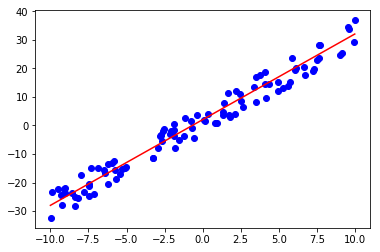

Ordinary: 1.64222061548 [ 2.92871114]
Ridge for alpha = 0.1: 1.64216183868 [ 2.92862204]
Ridge for alpha = 0.5: 1.64192676725 [ 2.92826569]
Ridge for alpha = 0.7: 1.64180925298 [ 2.92808755]
Lasso for alpha = 0.1: 1.64021363754 [ 2.92566876]
Lasso for alpha = 0.5: 1.63218572576 [ 2.91349925]
Lasso for alpha = 0.7: 1.62817176987 [ 2.9074145]


In [107]:
# 1D with noise

eps = 5.0
noise = generateData(-eps, eps, N, 1)[:, 0]

X = generateData(minValue, maxValue, N, 1)
X1 = X[:, 0]
Y = 2 + 3 * X1 + noise
pnd.DataFrame({"x1": X1,
               "y": Y}).to_csv("../temp/1D_w_noise.csv", index = False)
plt.scatter(X1, Y, color = "blue")
plt.plot([-10, 10], [-28, 32], color = "red")
plt.show()

getCoefficients("Ordinary:", LinearRegression(), X, Y)

getCoefficients("Ridge for alpha = 0.1:", Ridge(alpha_1), X, Y)
getCoefficients("Ridge for alpha = 0.5:", Ridge(alpha_2), X, Y)
getCoefficients("Ridge for alpha = 0.7:", Ridge(alpha_3), X, Y)

getCoefficients("Lasso for alpha = 0.1:", Lasso(alpha_1), X, Y)
getCoefficients("Lasso for alpha = 0.5:", Lasso(alpha_2), X, Y)
getCoefficients("Lasso for alpha = 0.7:", Lasso(alpha_3), X, Y)

In [109]:
# 3D with noise

eps = 5.0
noise = generateData(-eps, eps, N, 1)[:, 0]

X = generateData(-10.0, 10.0, 100, 3)
X1 = X[:, 0]
X2 = X[:, 1]
X3 = X[:, 2]
Y = X1 - 2 * X2 + 3 * X3 + noise
pnd.DataFrame({"x1": X1,
               "x2": X2,
               "x3": X3,
               "y": Y}).to_csv("../temp/3D_w_noise.csv", index = False)

getCoefficients("Ordinary:", LinearRegression(), X, Y)

getCoefficients("Ridge for alpha = 0.1:", Ridge(alpha_1), X, Y)
getCoefficients("Ridge for alpha = 0.5:", Ridge(alpha_2), X, Y)
getCoefficients("Ridge for alpha = 0.7:", Ridge(alpha_3), X, Y)

getCoefficients("Lasso for alpha = 0.1:", Lasso(alpha_1), X, Y)
getCoefficients("Lasso for alpha = 0.5:", Lasso(alpha_2), X, Y)
getCoefficients("Lasso for alpha = 0.7:", Lasso(alpha_3), X, Y)

Ordinary: -0.00469460828851 [ 0.96584873 -1.96454957  2.94846467]
Ridge for alpha = 0.1: -0.00467572446097 [ 0.96580235 -1.96449234  2.94837802]
Ridge for alpha = 0.5: -0.00460019355961 [ 0.96561687 -1.96426348  2.9480315 ]
Ridge for alpha = 0.7: -0.00456243075461 [ 0.96552415 -1.96414907  2.94785826]
Lasso for alpha = 0.1: -0.00472547417771 [ 0.9619286  -1.9615364   2.94530346]
Lasso for alpha = 0.5: -0.00483801546098 [ 0.94626135 -1.94947577  2.93266078]
Lasso for alpha = 0.7: -0.00489428610262 [ 0.93842772 -1.94344546  2.92633944]
